<a href="https://colab.research.google.com/github/onurerdogan2001/ie423tasks/blob/main/notebooks/task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

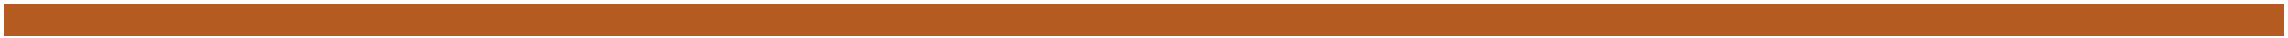

## <font color='#475468'> Football Players Value:</font>
### <font color='#475468'> Can you predict player value based on information?</font>

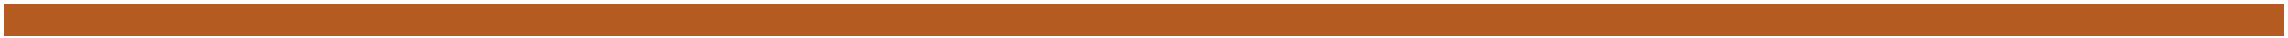

## Initialize

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load Data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
dfTips = pd.read_csv('/content/drive/MyDrive/yazokulu/football.csv')

#did not change the name of the file "dfTips", noticed this lately. - Onur

In [24]:
dfTips.head()

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0


In [6]:
dfTips.describe(include='all')

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
count,10754,10754,10754,10754,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,...,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,1.075400e+04,1.075400e+04,10754.000000,10754.000000
unique,10754,374,10584,16,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,/david-de-gea/profil/spieler/59377,Daejeon Hana Citizen,Paulinho,Defender Centre-Back,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,46,6,1821,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,181.240353,26.041903,36.407011,0.125554,0.086978,0.189757,...,0.131655,0.044881,2470.789381,117.961689,15.826297,1.960759,3.622971e+06,6.152606e+06,2.713223,0.307513
std,NaN,NaN,NaN,NaN,6.969818,4.777629,26.526541,0.235585,0.143351,0.432388,...,0.442335,0.924437,2021.703271,175.206827,23.383606,3.743936,9.095410e+06,1.338988e+07,0.986356,0.461485
min,NaN,NaN,NaN,NaN,156.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,0.000000
25%,NaN,NaN,NaN,NaN,176.000000,22.000000,12.000000,0.000000,0.000000,0.053191,...,0.000000,0.000000,660.000000,0.000000,0.000000,0.000000,3.000000e+05,4.500000e+05,2.000000,0.000000
50%,NaN,NaN,NaN,NaN,181.240353,26.000000,35.000000,0.045969,0.040773,0.150250,...,0.000000,0.000000,2101.500000,37.000000,5.000000,1.000000,8.000000e+05,1.500000e+06,3.000000,0.000000
75%,NaN,NaN,NaN,NaN,186.000000,29.000000,59.000000,0.172263,0.133136,0.248276,...,0.000000,0.000000,3968.000000,181.000000,24.000000,2.000000,3.000000e+06,5.000000e+06,4.000000,1.000000


## Fit a Regression Model to Predict Tip

In [7]:
# Assign independent(Y) and dependent(X) variables
X = dfTips.loc[:,['height','age', 'appearance', 'goals', 'assists', 'clean sheets', 'days_injured', 'award']]
Y = dfTips.loc[:,['current_value']]

In [8]:
# Fit linear regression model - aka train model
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X, Y)

LinearRegression()

In [9]:
# Display regression model
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 [-568835.5265041]
Coefficients: 
 [[ 4.68392007e+04 -4.21224768e+05  1.26462075e+05  1.05873841e+06
   3.04838120e+06  8.44277416e+04  2.94714137e+03  6.72460374e+05]]


In [10]:
# Generate new prediction - aka run scoring model
New_Height = 186.0
New_Age = 27
New_Appearance = 78
New_Goals = 14
New_Assists = 7
New_Clean_Sheets = 0
New_Days_Injured = 15
New_Award = 2
print ('Predicted current_value: \n', regr.predict([[New_Height ,New_Age ,New_Appearance,New_Goals,New_Assists,New_Clean_Sheets,New_Days_Injured,New_Award]]))

Predicted current_value: 
 [[44184362.91821593]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Explore Data

### EDA in Python

#### Histogram of value where the bins cover 1,000,000 increments

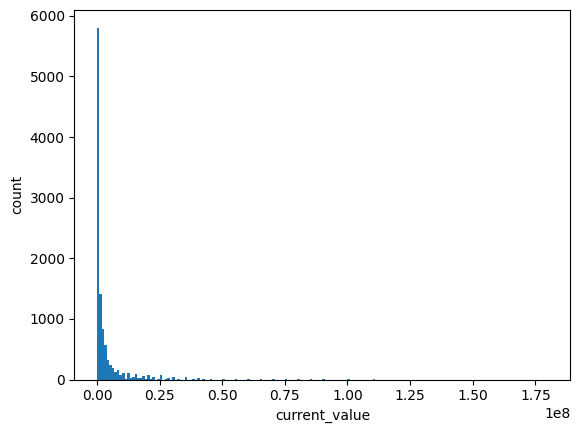

In [18]:
# Set data fields
y = dfTips.loc[:,'current_value']

# Set histogram parameters
binwidth = 1000000.0
binrange=np.arange(min(y), max(y) + binwidth, binwidth)

# Show plot
plt.hist(y, bins=binrange)
plt.xlabel('current_value')
plt.ylabel('count')
plt.show()

The distribution of values is skewed right and unimodal.

#### Histogram of value where the bins cover 20,000 increments

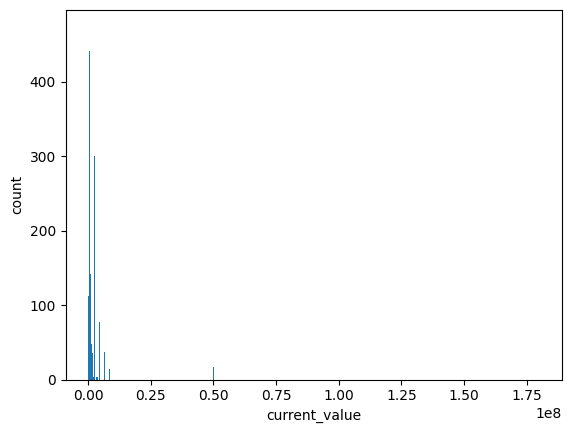

In [20]:
# Set data fields
y = dfTips.loc[:,'current_value']

# Set histogram parameters
binwidth = 20000.0
binrange=np.arange(min(y), max(y) + binwidth, binwidth)

# Show plot
plt.hist(y, bins=binrange)
plt.xlabel('current_value')
plt.ylabel('count')
plt.show()

A not very interesting thing is that values are peaked at some certain levels with many zeros, (probably) like 1,000,000 etc.

#### Scatterplot of tips vs. bill

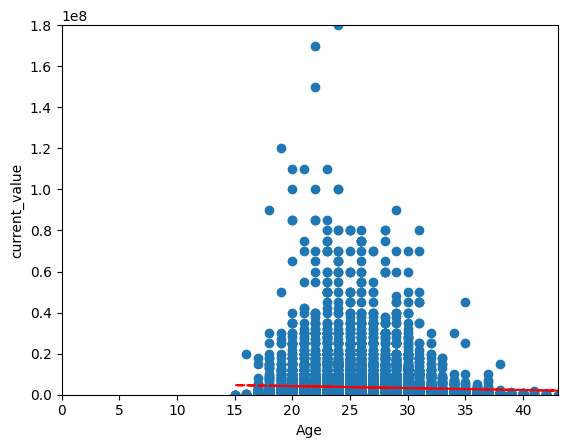

In [23]:
# Set data fields
x = dfTips.loc[:,'age']
y = dfTips.loc[:,'current_value']

# Generate trendline
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

# Show plot
plt.scatter(x, y)
plt.plot(x,p(x),"r--")
plt.xlim(0,np.max(dfTips.loc[:,'age']))
plt.ylim(0,np.max(dfTips.loc[:,'current_value']))
plt.xlabel('Age')
plt.ylabel('current_value')
plt.show()

To be honest I expected more in this plot, but still it can be seen that with age goes higher, maximum value among current_value gets lower. This is an expected phenomenon in football, since younger players shows more promise.

#### Scatterplot of current value vs. age separated by positions

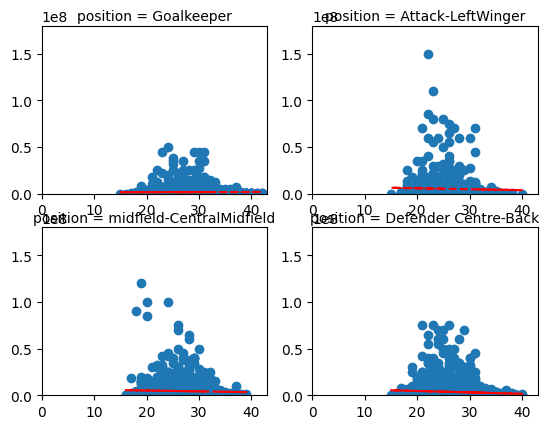

In [36]:
### Matrix of plots
fig, axs = plt.subplots(2, 2)

## Top left plot
x = dfTips.loc[(dfTips['position']=='Goalkeeper'),'age']
y = dfTips.loc[(dfTips['position']=='Goalkeeper'),'current_value']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

axs[0, 0].scatter(x,y)
axs[0, 0].plot(x,p(x),"r--")
axs[0, 0].set_xlim(0,np.max(dfTips.loc[:,'age']))
axs[0, 0].set_ylim(0,np.max(dfTips.loc[:,'current_value']))
axs[0, 0].set_xlabel('position = Goalkeeper')
axs[0, 0].xaxis.set_label_position("top")
#axs[0, 0].set_ylabel('position = Goalkeeper')
#axs[0, 0].yaxis.set_label_position("right")

## Top right plot
x = dfTips.loc[(dfTips['position']=='Attack-LeftWinger'),'age']
y = dfTips.loc[(dfTips['position']=='Attack-LeftWinger'),'current_value']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

axs[0, 1].scatter(x,y)
axs[0, 1].plot(x,p(x),"r--")
axs[0, 1].set_xlim(0,np.max(dfTips.loc[:,'age']))
axs[0, 1].set_ylim(0,np.max(dfTips.loc[:,'current_value']))
axs[0, 1].set_xlabel('position = Attack-LeftWinger')
axs[0, 1].xaxis.set_label_position("top")

## Bottom left plot
x = dfTips.loc[(dfTips['position']=='midfield-CentralMidfield'),'age']
y = dfTips.loc[(dfTips['position']=='midfield-CentralMidfield'),'current_value']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

axs[1, 0].scatter(x,y)
axs[1, 0].plot(x,p(x),"r--")
axs[1, 0].set_xlim(0,np.max(dfTips.loc[:,'age']))
axs[1, 0].set_ylim(0,np.max(dfTips.loc[:,'current_value']))
axs[1, 0].set_xlabel('position = midfield-CentralMidfield')
axs[1, 0].xaxis.set_label_position("top")

## Bottom right plot
x = dfTips.loc[(dfTips['position']=='Defender Centre-Back'),'age']
y = dfTips.loc[(dfTips['position']=='Defender Centre-Back'),'current_value']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

axs[1, 1].scatter(x,y)
axs[1, 1].plot(x,p(x),"r--")
axs[1, 1].set_xlim(0,np.max(dfTips.loc[:,'age']))
axs[1, 1].set_ylim(0,np.max(dfTips.loc[:,'current_value']))
axs[1, 1].set_xlabel('position = Defender Centre-Back')
axs[1, 1].xaxis.set_label_position("top")

It can be seen that if age increase the wingers' value goes down, however goalkeepers' value doesnt seem to be effected by age this much. Again, defenders seem to be less effected than midfields and wingers by age.



## Takeaways

More analysis can be conducted through more comparisions. For example, the importance of the physicality of the football is increased in the last decade, Thus, I want to see how height affects the value.

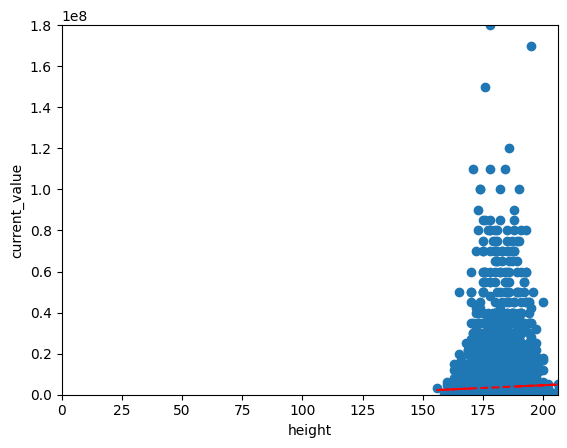

In [46]:
# Set data fields
x = dfTips.loc[:,'height']
y = dfTips.loc[:,'current_value']

# Generate trendline
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

# Show plot
plt.scatter(x, y)
plt.plot(x,p(x),"r--")
plt.xlim(0,np.max(dfTips.loc[:,'height']))
plt.ylim(0,np.max(dfTips.loc[:,'current_value']))
plt.xlabel('height')
plt.ylabel('current_value')
plt.show()

It can be seen that with height increases, the value increases too. I think this will be more noticeable in next years.

utexas_ds_orie_divider_gray.png